In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm
from geodosic.model.parametrized_subvolume import myskewnorm

In [35]:
a_range = -np.logspace(0, 6, 4)
size = 1000

time_old, time_new = [], []
a_old, a_new = [], []
for a in a_range:
    print(a)
    x = skewnorm.rvs(a, size=size, random_state=0)
#     x += np.random.normal(0, 0.5, size)
    
    timeit_old = %timeit -oq skewnorm.fit(x)
    timeit_new = %timeit -oq myskewnorm.fit(x)
    time_old.append(timeit_old.best)
    time_new.append(timeit_new.best)
    
    ahat_old, _, _ = skewnorm.fit(x)
    ahat_new, _, _ = myskewnorm.fit(x)
    a_old.append(ahat_old)
    a_new.append(ahat_new)
    
a_old = np.array(a_old)
a_new = np.array(a_new)

-1.0
-100.0
-10000.0
-1000000.0


/usr/local/lib/python3.6/site-packages/matplotlib/ticker.py:2041: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


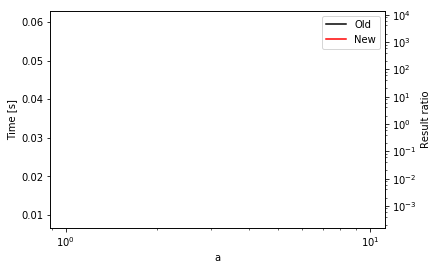

In [36]:
fig, ax1 = plt.subplots()

ax1.semilogx(a_range, time_old, 'k-', label='Old')
ax1.semilogx(a_range, time_new, 'r-', label='New')
plt.legend(loc='best')
ax1.set_xlabel('a')
ax1.set_ylabel('Time [s]')

ax2 = ax1.twinx()
ax2.loglog(a_range, a_old/a_range, 'k:', label='Old')
ax2.loglog(a_range, a_new/a_range, 'r:', label='New')
ax2.set_ylabel('Result ratio')

In [37]:
print(a_old/a_range)
print(a_new/a_range)

[  1.34194559e+00   9.50250706e-01   2.05533350e+01   3.55624121e-04]
[  1.34198143e+00   9.50242072e-01   6.08089972e+03   3.55623964e-04]
